# **Lab 1 – Exploratory Data Analysis (EDA): Bank Marketing Dataset**

Exploratory Data Analysis (EDA) is the first and most important step in any data science workflow.  
Its main goal is to **understand the dataset** before applying any modeling techniques — by exploring its structure, detecting patterns, and identifying issues such as missing values or outliers.

In this lab, we analyze the **Bank Marketing** dataset from the **UCI Machine Learning Repository**.  
This dataset contains information collected from direct marketing campaigns carried out by a Portuguese banking institution.  
Each record represents a client and whether they **subscribed to a term deposit**, represented by the target variable **`y`** (`yes` / `no`).

Our analysis is performed in **Python** using the following libraries:  
- `pandas` for data manipulation  
- `numpy` for numerical computation  
- `matplotlib` and `seaborn` for data visualization  

### **Objectives**
The main objectives of this lab are to:
- Obtain an initial understanding of the dataset and its variables  
- Summarize key statistics for both numerical and categorical features  
- Visualize data distributions and relationships between variables  
- Identify potential outliers or inconsistencies  
- Prepare the groundwork for **Lab 2: Data Preparation and Cleaning**

## Step 0 — Setup & Load (no transformations)

In [ ]:
# In this notebook, we will use the following Python modules:
# - `pandas` — for data loading and manipulation  
# - `numpy` — for numerical operations  
# - `matplotlib` and `seaborn` — for data visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/bank.csv", sep=";")

## Step 1 – Sampling Bias Check

Before analyzing or cleaning the data, we quickly verify that the sample is balanced and representative.  
We check if some categories or time periods dominate the dataset.

In [32]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


###  Target Balance
We check if the number of clients who subscribed (`y = yes`) and those who did not (`y = no`) is reasonably balanced.

Target distribution (%):
y
no     88.476001
yes    11.523999
Name: proportion, dtype: float64


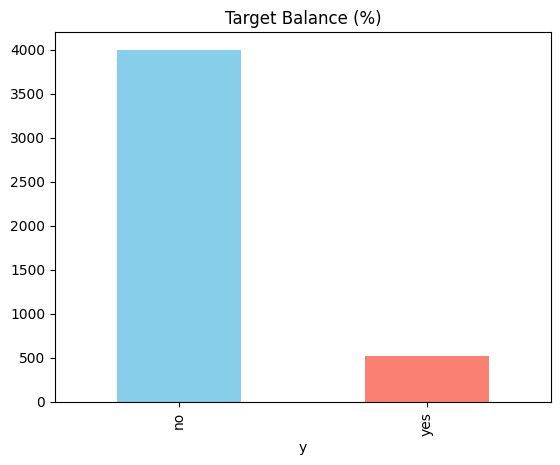

In [6]:
print("Target distribution (%):")
print(df['y'].value_counts(normalize=True) * 100)

df['y'].value_counts().plot(kind='bar', title='Target Balance (%)', color=['skyblue','salmon'])
plt.show()

### Temporal Coverage
We verify that the contacts are spread over different months to ensure there is no heavy concentration in a specific period.

In [7]:
print("Month coverage (%):")
print(df['month'].value_counts(normalize=True).round(3) * 100)

Month coverage (%):
month
may    30.9
jul    15.6
aug    14.0
jun    11.7
nov     8.6
apr     6.5
feb     4.9
jan     3.3
oct     1.8
sep     1.2
mar     1.1
dec     0.4
Name: proportion, dtype: float64


###  Main Categorical Features
We look at a few key variables (`job`, `marital`, `education`) to check if any category is over-represented.

In [8]:
for col in ['job', 'marital', 'education']:
    print(f"\n{col.capitalize()} distribution (%):")
    print(df[col].value_counts(normalize=True).round(3).head() * 100)


Job distribution (%):
job
management     21.4
blue-collar    20.9
technician     17.0
admin.         10.6
services        9.2
Name: proportion, dtype: float64

Marital distribution (%):
marital
married     61.9
single      26.5
divorced    11.7
Name: proportion, dtype: float64

Education distribution (%):
education
secondary    51.0
tertiary     29.9
primary      15.0
unknown       4.1
Name: proportion, dtype: float64


### Age Overview
We review the summary statistics for the `age` column to make sure the sample covers a reasonable age range.

In [9]:
df['age'].describe()

count    4521.000000
mean       41.170095
std        10.576211
min        19.000000
25%        33.000000
50%        39.000000
75%        49.000000
max        87.000000
Name: age, dtype: float64

In [10]:
# Print last 5 rows of the dataframe
df.tail(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


**Summary:**  
The goal here is to confirm that:
- The target classes are not extremely unbalanced.  
- The dataset covers multiple months and categories fairly.  
- The age variable shows a realistic range of values.  

Any strong imbalance will be noted as a possible source of sampling bias before proceeding to data quality checks.

## Step 2 – Data Quality Issues

Now that we verified the sample balance, we focus on detecting potential **data quality problems** such as:
- Missing or unknown values  
- Outliers in numeric columns  
- Inconsistent or unexpected entries  

We only **observe** these issues here — any fixes will be done later during data preparation.

In [11]:
import numpy as np

# Quick overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


### Missing Values
We check if there are any `NaN` or empty cells in the dataset.

In [12]:
print("Missing values per column:")
print(df.isnull().sum())

# Quick visual summary
print("\nAny missing values?", df.isnull().values.any())

Missing values per column:
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

Any missing values? False


### Hidden Missing Data
Some features contain values such as `"unknown"` which are not NaN but still represent missing information.

Columns containing 'unknown' values: ['job', 'education', 'contact', 'poutcome']


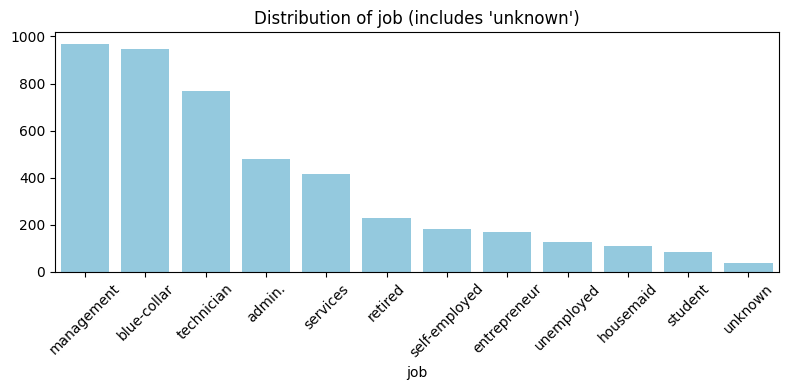

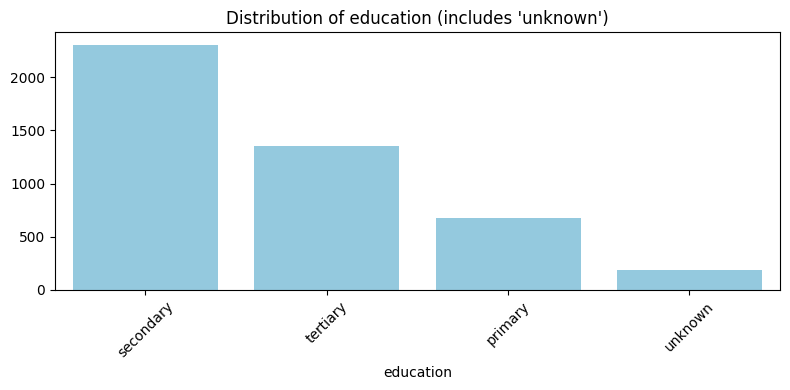

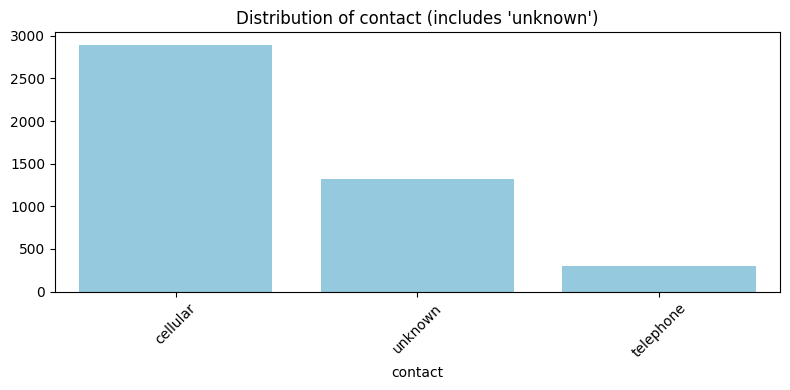

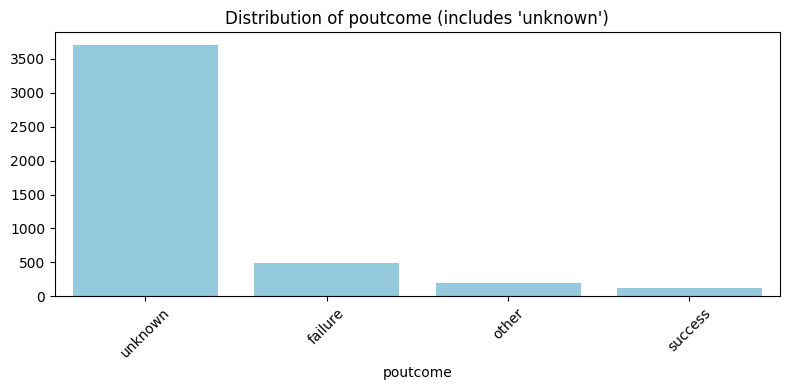

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select categorical columns (object type)
categorical_variables = df.select_dtypes(include='object').columns

# Filter only those that contain "unknown"
cols_with_unknown = [col for col in categorical_variables if 'unknown' in df[col].unique()]

print("Columns containing 'unknown' values:", cols_with_unknown)

# Plot only for columns with "unknown" values
for col in cols_with_unknown:
    plt.figure(figsize=(8,4))
    sns.barplot(
    x=df[col].value_counts().index,
    y=df[col].value_counts().values,
    color="skyblue"  # instead of palette
)
    plt.title(f"Distribution of {col} (includes 'unknown')")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Outliers in Numeric Columns
We inspect summary statistics to detect unusual or extreme values in continuous features.

In [14]:
numeric_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
df[numeric_cols].describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


### Quick Visual Check for Outliers
We plot boxplots for key numeric columns to easily spot extreme points.

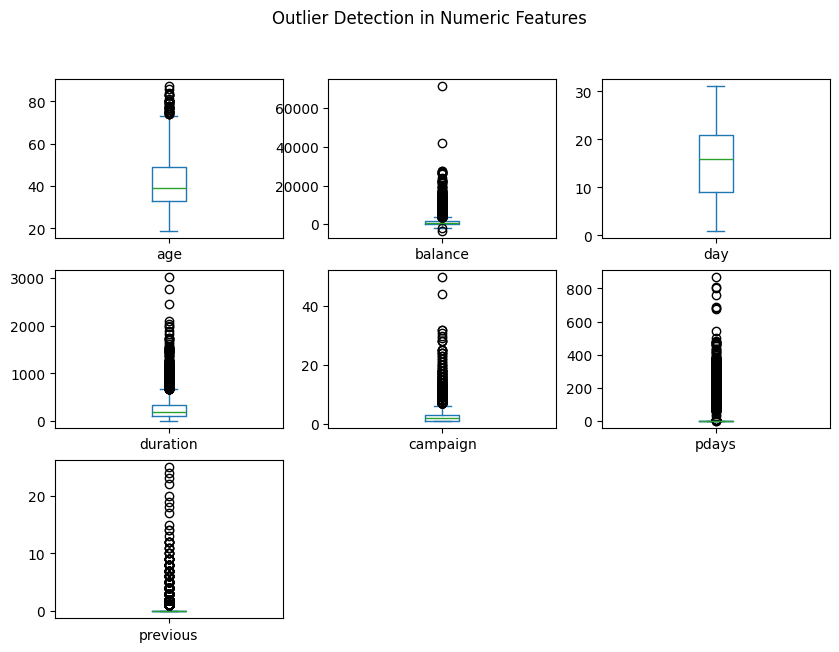

In [15]:
df[numeric_cols].plot(kind='box', subplots=True, layout=(3,3), figsize=(10,7), sharex=False, sharey=False)
plt.suptitle('Outlier Detection in Numeric Features', fontsize=12)
plt.show()

### Interpretation of Boxplots

The boxplots show how the numeric features are distributed and help identify potential outliers:

- **Age:**  
  The distribution of ages is relatively compact, with only a few minor outliers. Most clients fall within a normal working-age range (roughly 20–60 years).

- **Balance:**  
  This variable shows a **strongly skewed distribution** with a large number of extreme values on the right.  
  Many clients have small or even negative balances, while a few have very high positive balances (up to more than €40,000).  
  → Indicates significant **financial variability** and potential **outliers** that may need treatment later.

- **Day:**  
  The `day` variable represents the day of the month for the last contact. It is almost uniformly distributed and does not show outliers.  
  → No issue detected.

- **Duration:**  
  Shows some extreme values as well (very long calls).  
  However, as mentioned earlier, this variable is **not informative** for modeling, since duration is known only *after* the contact result.  
  → We will likely exclude it later.

- **Campaign:**  
  Mostly small values with a few very large outliers — meaning that most clients were contacted only a few times, while some received many calls.

- **Pdays:**  
  Displays many zero or near-zero values (clients not previously contacted) but also a few very large outliers, confirming a **highly skewed** distribution.

- **Previous:**  
  Similar to `campaign`, this variable has many zeros and a few very large values — indicating that some clients had been contacted many times in past campaigns.



**Summary:**
- The dataset contains several **skewed and heavy-tailed numeric features**, especially `balance`, `pdays`, and `campaign`.  
- These outliers are genuine business data (not errors) but should be **handled carefully during modeling** — e.g., through scaling or log transformation.  
- No missing values detected in numeric columns, only variability and outliers.

## Step 3 – Irrelevant or Non-Informative Attributes

In this step, we identify columns that do not provide meaningful information or could bias our analysis.  
We look for variables that are constant, redundant, or logically irrelevant to the prediction task.

In [16]:
# 1️⃣ Detect constant or duplicated columns automatically
constant_cols = [col for col in df.columns if df[col].nunique() == 1]

duplicate_cols = []
for i, col1 in enumerate(df.columns):
    for col2 in df.columns[i+1:]:
        if df[col1].equals(df[col2]):
            duplicate_cols.append(col2)

print("Columns with a single unique value:", constant_cols)
print("Duplicated columns:", duplicate_cols)

Columns with a single unique value: []
Duplicated columns: []


### Domain-Based Exclusion
Even if not constant, some variables can still be **non-informative** for modeling because of their context.  
In this dataset, **`duration`** represents the call length, which is only known *after* the outcome (`y`) is decided.  
Including it would cause **data leakage** — the model would use future information to predict the present.

In [17]:
# Manually mark 'duration' as non-informative
non_informative_cols = ['duration']

print("Manually identified non-informative columns:", non_informative_cols)

Manually identified non-informative columns: ['duration']


**Summary:**
- No constant or duplicated columns found.  
- The variable **`duration`** is considered **non-informative** and should be excluded from modeling to avoid data leakage.  
- All other variables remain relevant for now.

## Step 4 – Examine Data Distributions

At this stage, we explore the **numerical variables** to understand their spread, detect outliers, and assess normality.  
This helps us decide later whether we need scaling, transformation, or outlier handling.

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("Numeric columns:", list(numeric_cols))

Numeric columns: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']


### Descriptive Statistics
We start by checking basic statistical measures (mean, std, min, max, quartiles) for each numeric variable.

In [19]:
df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
balance,4521.0,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
day,4521.0,15.915284,8.247667,1.0,9.0,16.0,21.0,31.0
duration,4521.0,263.961292,259.856633,4.0,104.0,185.0,329.0,3025.0
campaign,4521.0,2.793630,3.109807,1.0,1.0,2.0,3.0,50.0
pdays,4521.0,39.766645,100.121124,-1.0,-1.0,-1.0,-1.0,871.0
previous,4521.0,0.542579,1.693562,0.0,0.0,0.0,0.0,25.0


#### Analysis of `df.describe()` Results

The dataset contains **4,521 observations**, with all columns numerical and no missing values.  
Here is a detailed interpretation of each attribute:


#### `age`
- Average age: **41 years**, with a range from **19 to 87**.  
- Most clients are adults in the **30–50 age range**, showing moderate variability (`std ≈ 10.6`).  
- Indicates a diverse client base, from young adults to seniors.


#### `balance`
- Average account balance: **€1,422**, but with **very high variability** (`std ≈ 3,009`).  
- Some clients have **negative balances** (overdrafts), minimum `-3313`, and extreme positives up to `71,188`.  
- This column is **heavily skewed**, so normalization or log-scaling may be useful.


#### `day`
- Represents the **day of the month** when contact occurred (1–31).  
- Roughly uniform distribution, with little variation (`std ≈ 8.25`).  
- Likely has **low predictive value** for modeling outcomes.


#### `duration`
- Mean call duration: **≈ 264 seconds (4.4 minutes)**.  
- High variability (`std ≈ 260`), with some very long calls up to **50 minutes**.  
- Strongly related to success rate (longer calls often lead to subscriptions),  
  but should **not** be used for prediction since it’s known only *after* the call.


#### `campaign`
- Clients were contacted **on average 3 times**, with some up to **50 times**.  
- The distribution is **right-skewed**, most clients were contacted less than 5 times.  
- Many contacts may indicate **lower engagement** or **ineffective targeting**.


#### `pdays`
- Indicates **days since last contact** from a previous campaign.  
- Value **–1** means the client was **never contacted before**.  
- The median and 75th percentile are –1, so most clients were new.  
- A few high values (up to 871 days) suggest long-term follow-ups.  
- Could be simplified into a **binary variable**: contacted_before (yes/no).


#### `previous`
- Average number of previous contacts: **0.54**, with most clients having **0**.  
- A few clients have up to **25** previous contacts.  
- Another **right-skewed** feature; may relate closely to `pdays`.


#### Summary
| Variable | Observation |
|:--|:--|
| `age` | Mostly adults (30–50), wide range |
| `balance` | Highly skewed, large outliers |
| `day` | Uniformly distributed, low impact |
| `duration` | High variability, linked to success |
| `campaign` | Few calls on average, skewed |
| `pdays` | Mostly –1 (new clients) |
| `previous` | Mostly 0, few repeat contacts |


### Distribution Plots
We visualize the distribution of each numeric variable to see skewness, peaks, or outliers.

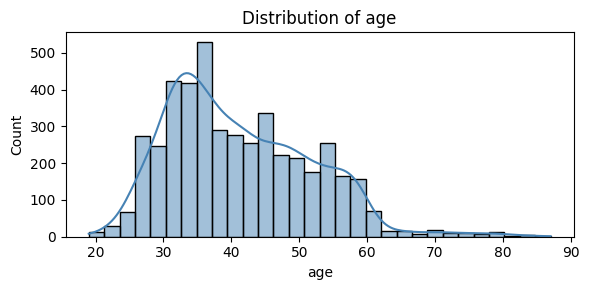

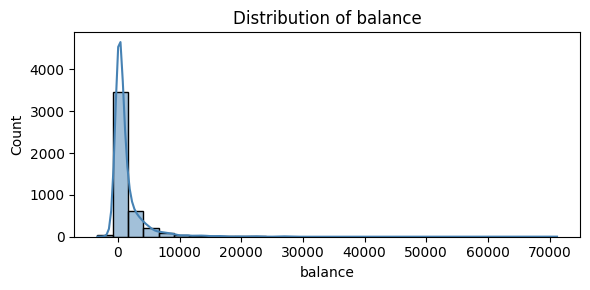

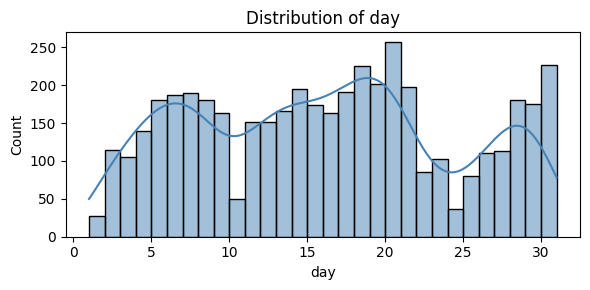

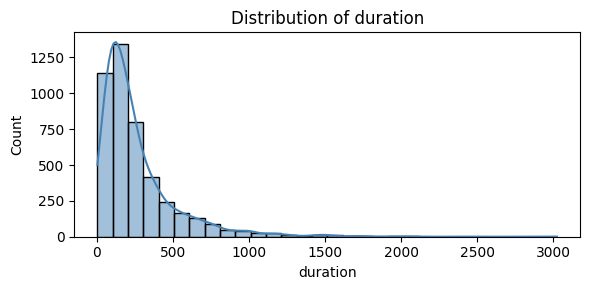

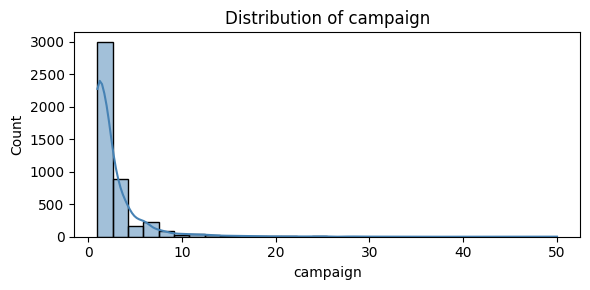

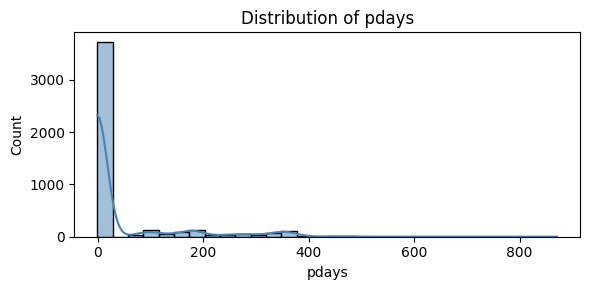

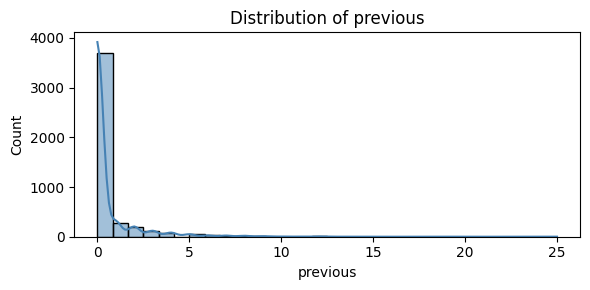

In [20]:
for col in numeric_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], bins=30, kde=True, color='steelblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

## Step 5 – Analyse Feature Relationships

In this step, we explore how the features relate to each other and to the target variable.  
We focus on:
- Detecting correlations between numeric variables.  
- Observing potential dependencies between categorical features and the target.  
This helps identify redundant or strongly related attributes.

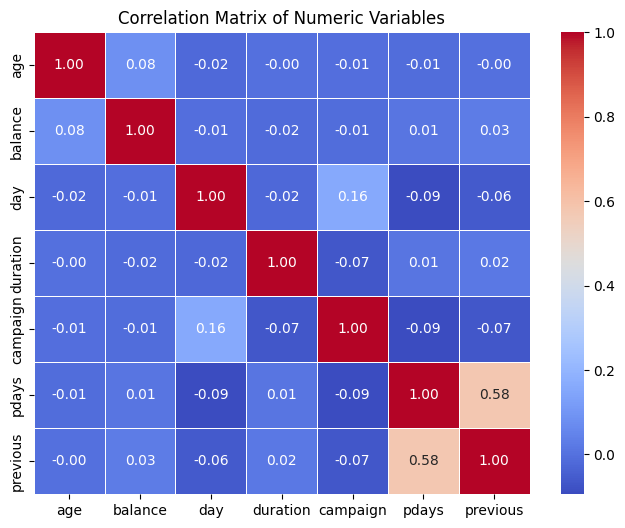

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Compute correlation matrix
corr = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Variables")
plt.show()

In [23]:
# Quick look at strongest correlations (absolute value > 0.5)
corr_pairs = corr.unstack().sort_values(ascending=False)
strong_corrs = corr_pairs[(abs(corr_pairs) > 0.5) & (corr_pairs < 1)]
print("Strongest correlations among numeric variables:")
print(strong_corrs.head(10))

Strongest correlations among numeric variables:
previous  pdays       0.577562
pdays     previous    0.577562
dtype: float64


### Interpretation of the Correlation Matrix

The correlation matrix shows how the numeric features in the dataset are related to each other.  
Most correlations are **very weak (close to 0)**, which means that the numeric variables are largely **independent** of one another.  

#### Key observations:
- **`pdays` and `previous`** have the **strongest positive correlation (~0.58)**.  
  → This is expected, since both describe client contact history (days since last contact and number of previous contacts).  
  → This relationship suggests they provide similar information, though not fully redundant.

- **`campaign` and `day`** show a small positive correlation (~0.16).  
  → This may simply reflect operational scheduling patterns during campaigns.

- All other variables, such as **`age`**, **`balance`**, and **`duration`**, show **almost no correlation** with each other (values between -0.1 and +0.1).  
  → Indicates that these variables contribute different information and are not linearly related.

#### Summary:
- The dataset has **low multicollinearity**, which is good for modeling.  
- The only moderately related pair is **`pdays`–`previous`**, which we may monitor for redundancy.  
- These weak correlations confirm that each numeric feature captures a distinct aspect of the clients’ profile or campaign behavior.

### Relationship Between Numeric Features and Target `y`
We now explore how the target (`y`) relates to some key numeric features.  
Since `y` is categorical (yes/no), we use boxplots to compare distributions.

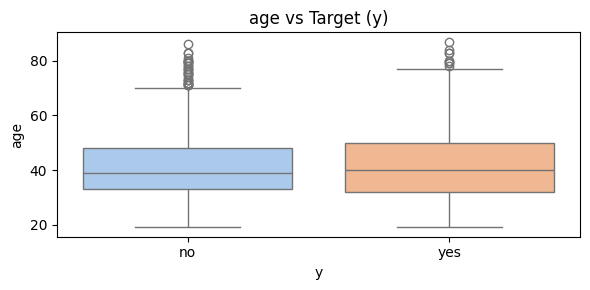

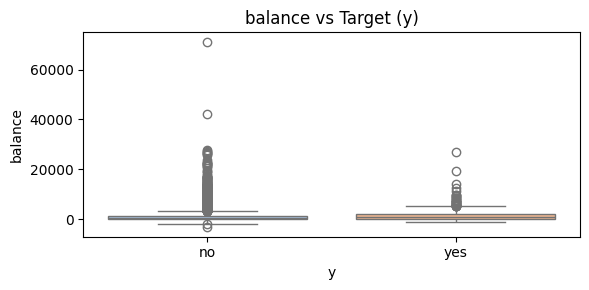

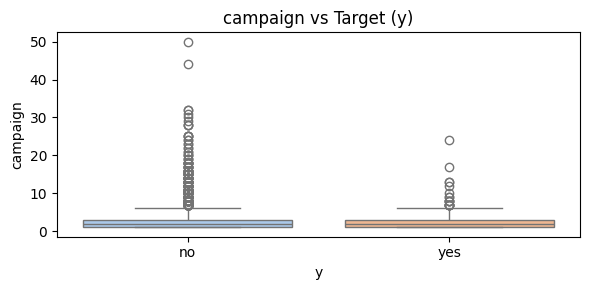

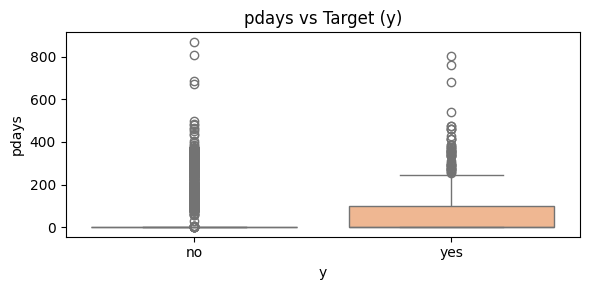

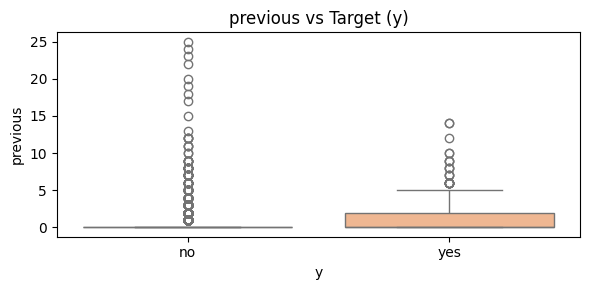

In [24]:
important_num = ['age', 'balance', 'campaign', 'pdays', 'previous']

for col in important_num:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x='y', y=col, hue='y', data=df, palette='pastel', legend=False)
    plt.title(f"{col} vs Target (y)")
    plt.tight_layout()
    plt.show()

### Interpretation: Numeric Features vs Target (y)

These boxplots compare the distributions of key numeric variables between clients who subscribed (`y = yes`) and those who did not (`y = no`).

#### 1. Age
- The median age is slightly higher for clients who **subscribed**.
- Most clients are between 30 and 60 years old in both groups.
- This suggests that **middle-aged clients** tend to subscribe more often than younger ones.

#### 2. Balance
- The distribution is highly skewed, with many clients having low or even negative balances.
- Clients who **subscribed (`yes`)** generally have **higher average balances**, meaning financial stability might positively influence subscription.
- A few extreme outliers (very high balances) appear in both groups.

#### 3. Campaign
- The number of contacts (`campaign`) is usually low for both groups, but slightly higher for `no`.
- The **“yes” group tends to have fewer contact attempts**, suggesting that **too many calls reduce the likelihood** of a successful subscription.
- Outliers show that some clients received dozens of calls with little success.

#### 4. Pdays
- For most clients with `y = no`, `pdays` = 0 or -1 (meaning they were never contacted before).
- Those who **subscribed** (`yes`) often have **lower pdays** values — they were contacted **more recently** in past campaigns.
- This confirms that **recency of previous contact** increases the chance of success.



### **Summary:**
- Clients with **higher balances**, **fewer contact attempts**, and **more recent past interactions** (`low pdays`) are more likely to subscribe.  
- Age plays a moderate role, while extreme values and skewed distributions confirm the need for **scaling and outlier treatment** in later preprocessing.

### Categorical Features vs Target
We can also visualize how the target (`y`) varies across main categorical features such as job, education, and contact.

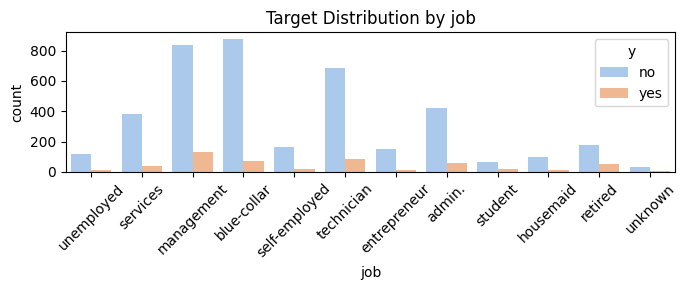

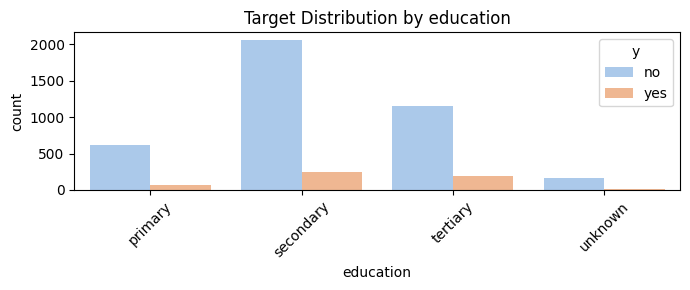

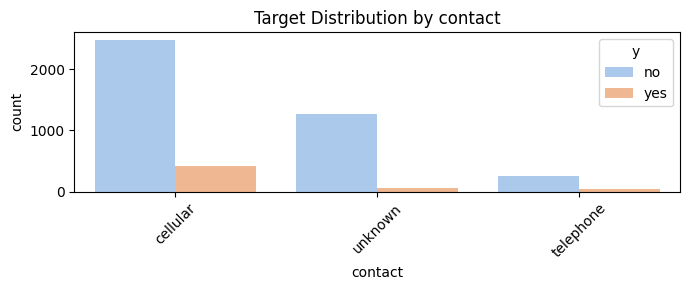

In [25]:
cat_features = ['job', 'education', 'contact']

for col in cat_features:
    plt.figure(figsize=(7,3))
    sns.countplot(x=col, hue='y', data=df, palette='pastel')
    plt.title(f"Target Distribution by {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Interpretation: Categorical Features vs Target (y)

These plots illustrate how the subscription outcome (`y`) differs among job types, education levels, and contact methods.

#### 1. Job
- Most clients belong to **management**, **blue-collar**, and **technician** categories.  
- The number of successful subscriptions (`yes`) is relatively higher among **management**, **technician**, and **services** groups.  
- The **blue-collar** group is the largest overall, but its success rate (ratio of “yes”) is relatively low.  
  -> This suggests that **profession and social status** may influence the likelihood of subscribing.

#### 2. Education
- The majority of clients have a **secondary** education level, followed by **tertiary** (university) and **primary**.  
- Clients with **tertiary education** show a higher proportion of successful subscriptions.  
  -> Higher education appears to be associated with greater openness to financial products.

#### 3. Contact Type
- Most successful contacts were made through **cellular** phones.  
- Very few positive responses came from **telephone** contacts, and none from the **unknown** group.  
  -> Indicates that **modern and personal communication channels** (cellular) are far more effective than landlines.



### **Summary:**
- **Job**, **education**, and **contact type** clearly influence the campaign’s success rate.  
- Clients who are **well-educated**, **professionally active in management or technical roles**, and **contacted via mobile** are **more likely to subscribe** to the term deposit.

## Step 6 – Investigate Subgroup Variations

In this step, we examine how the target variable (`y`) behaves across different **subgroups** of clients.  
The goal is to identify patterns or trends between demographic or social groups and their likelihood to subscribe.

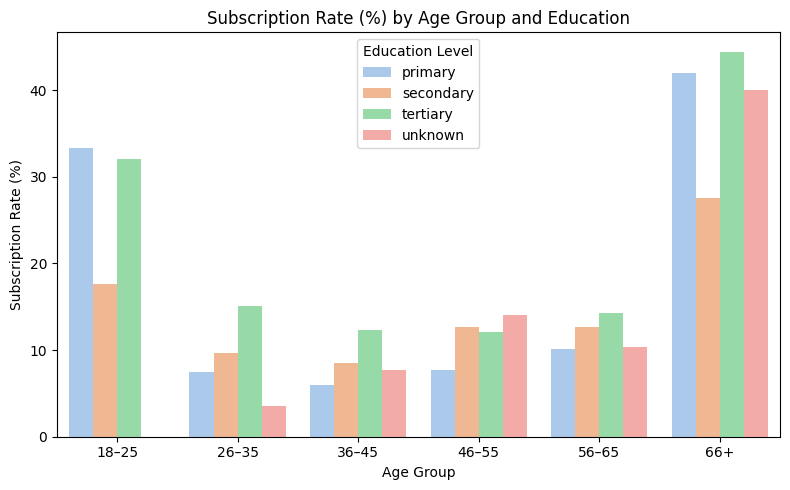

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create age bins to group clients by range
age_bins = pd.cut(df['age'], bins=[17,25,35,45,55,65,120],
                  labels=['18–25','26–35','36–45','46–55','56–65','66+'])

# Compute subscription rate (%) by subgroup
subgroup_data = (
    df.groupby([age_bins, 'education'], observed=False)['y']
      .value_counts(normalize=True)
      .rename('rate')
      .mul(100)
      .reset_index()
)


# Keep only 'yes' results for clarity
subgroup_data_yes = subgroup_data[subgroup_data['y'] == 'yes']

# Plot subgroup variation
plt.figure(figsize=(8,5))
sns.barplot(x='age', y='rate', hue='education', data=subgroup_data_yes, palette='pastel')
plt.title('Subscription Rate (%) by Age Group and Education')
plt.ylabel('Subscription Rate (%)')
plt.xlabel('Age Group')
plt.legend(title='Education Level')
plt.tight_layout()
plt.show()

### Interpretation: Subscription Rate by Age Group and Education

This chart shows how the probability of subscribing (`y = yes`) changes across different **age ranges** and **education levels**.

#### Key Observations

- **18–25 years:**  
  Clients in this youngest group show relatively **high subscription rates**, especially those with **primary** or **secondary** education.  
  Younger people may be more open to new financial products or starting their first savings.

- **26–55 years:**  
  Middle-aged groups (26–35, 36–45, 46–55) have **lower overall subscription rates**, regardless of education level.  
  These clients might already have existing financial commitments or less interest in term deposits.

- **56–65 years:**  
  A slight increase in subscription rates appears, particularly among **tertiary-educated** clients, suggesting that higher education could increase financial awareness in this segment.

- **66+ years:**  
  The highest subscription rates occur in the **senior group**, across all education levels.  
  This makes sense — older clients are more likely to invest in long-term or secure savings options like term deposits.

#### Education Effect
- Across all age groups, **education level positively influences subscription rates**.  
  Clients with **tertiary education** consistently show higher interest in term deposits.  
  The “unknown” category behaves similarly to secondary education, but it’s less reliable for interpretation.


**Summary:**
- **Older and more educated clients** are the most likely to subscribe.  
- **Young clients** also respond positively, especially at the start of their careers.  
- Education remains an important differentiator of financial engagement across all age groups.

We can repeat this type of analysis for other combinations, such as **job vs contact method** or **education vs balance**.

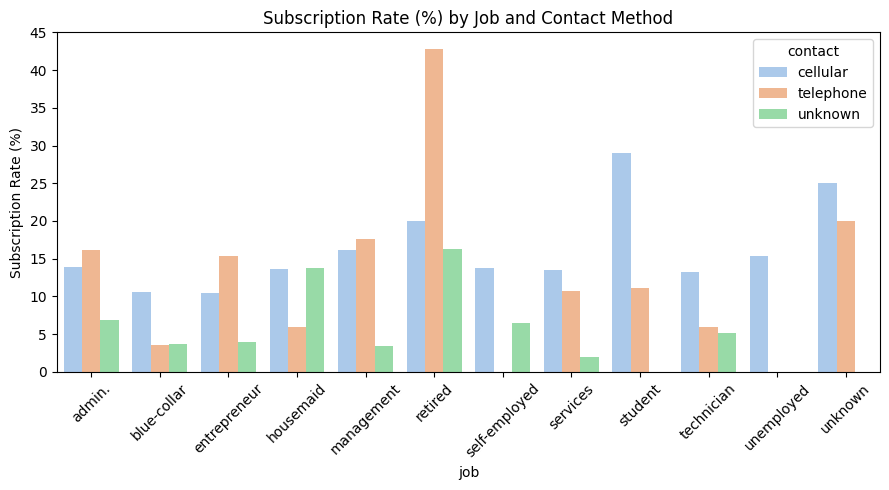

In [29]:
# Example: Subscription rate by job and contact method
job_contact = (df.groupby(['job', 'contact'])['y']
                 .value_counts(normalize=True)
                 .rename('rate')
                 .mul(100)
                 .reset_index())

job_contact_yes = job_contact[job_contact['y'] == 'yes']

plt.figure(figsize=(9,5))
sns.barplot(x='job', y='rate', hue='contact', data=job_contact_yes, palette='pastel')
plt.title('Subscription Rate (%) by Job and Contact Method')
plt.ylabel('Subscription Rate (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Interpretation: Subscription Rate by Job and Contact Method

This chart compares how the **success rate (y = yes)** varies across job types and the contact method used (cellular, telephone, or unknown).

#### 1. General Trend
- The **cellular contact method** consistently produces the **highest subscription rates** across most job categories.  
  → Indicates that mobile communication is the most effective channel for this campaign.  
- The **telephone** and **unknown** methods perform much worse overall.

#### 2. Job-Specific Insights
- **Retired clients** show the **highest overall subscription rate (~40%)**, especially when contacted via **telephone**.  
  → Suggests this group is highly receptive regardless of contact type.
  
- **Management**, **services**, and **students** also show strong positive responses, especially via **cellular** contact.  
  → Professionals and younger clients tend to respond well to personalized or mobile interactions.

- **Blue-collar** and **technician** groups display much lower success rates, regardless of contact method.  
  → These clients might be harder to reach or less interested in long-term deposits.

- The **admin.** and **entrepreneur** groups show moderate success with both **cellular** and **telephone** contacts.

#### 3. Contact Method Effectiveness
- Across almost every job category, **cellular contact outperforms telephone**.  
  - This may reflect that mobile calls allow better timing and flexibility.  
  - Traditional landline contacts appear outdated or less engaging.


**Summary:**
- **Contact method** has a strong impact on campaign success.  
- **Cellular** is clearly the most effective communication channel.  
- The **retired** and **management** groups are the most responsive audiences, while **blue-collar** and **technician** categories are less influenced.  
- These findings can guide targeted campaign strategies for future marketing efforts.

### Conclusion: Subgroup Variations

From the subgroup analyses, several important insights emerge:

- **Demographic patterns:** Older and more educated clients show higher subscription rates, while middle-aged groups are less responsive.  
- **Education effect:** Tertiary education consistently correlates with greater openness to term deposits, highlighting financial awareness.  
- **Job influence:** Professions such as management, services, and students show stronger engagement, while blue-collar and technician roles have lower success rates.  
- **Contact method:** Cellular communication remains the most effective channel across all groups, confirming that modern contact methods outperform traditional ones.

**In summary**, subgroup analysis confirms that client characteristics and communication strategies strongly influence campaign success.  
These findings will guide the next step — understanding **correlations, causality, and potential biases** to avoid over-interpreting results.

## Step 7 – Avoid Over-Interpreting Correlations

Now that we have explored several relationships, it is important to remember that **correlation does not imply causation**.  
Many of the relationships we observed may be **influenced by hidden or confounding variables**.  
The goal of this step is to reflect critically on what our data actually tells us — and what it does not.

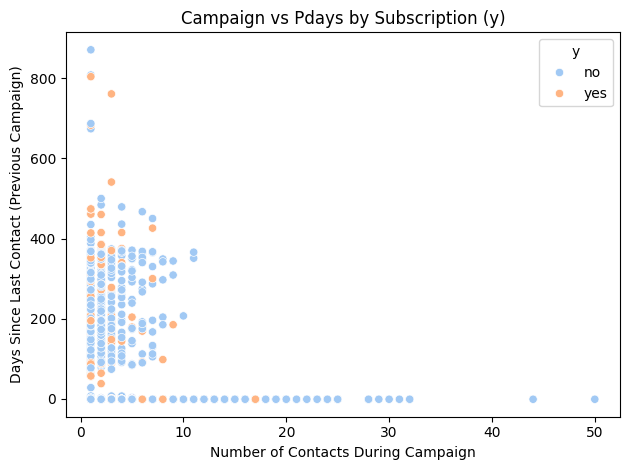

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example: visualize a known correlation that should not be over-interpreted
sns.scatterplot(x='campaign', y='pdays', data=df, hue='y', palette='pastel')
plt.title("Campaign vs Pdays by Subscription (y)")
plt.xlabel("Number of Contacts During Campaign")
plt.ylabel("Days Since Last Contact (Previous Campaign)")
plt.tight_layout()
plt.show()

### Interpretation: Campaign vs Pdays

This scatter plot compares the **number of contacts during the current campaign** (`campaign`)  
with the **days since last contact in the previous campaign** (`pdays`), colored by the target variable (`y`).

#### Key Observations
- Most clients cluster near **low campaign counts** (1–5 calls) and **low pdays** values (0–400).  
  This indicates that clients contacted recently also tend to receive fewer calls in the current campaign.
- A few extreme cases show very high values for `pdays` or `campaign`, but they are rare and do not form a clear pattern.
- Both `campaign` and `pdays` show some relationship with the subscription result (`y`),  
  but that doesn’t mean **more calls or fewer days directly cause success**.

#### Interpretation Caution
- The apparent relationship between these variables may result from **campaign strategy**, not client behavior.  
  For instance, the marketing team might **recontact recent clients more often**, which introduces bias.
- Therefore, we should **avoid concluding causality** (e.g., “calling more often increases success”).  
  Instead, we interpret this as a **pattern shaped by operational choices**, not a natural effect.

**Summary:**
This visualization reminds us that **correlations can reflect internal processes rather than real behavioral causes**.  
Before using such variables in modeling, we must carefully test and control for campaign-related bias.

## Step 8 – Report Insights Fairly

### Key insights
- **Who subscribes more?** Older clients (66+) and younger adults (18–25) show higher subscription rates; **tertiary education** helps across ages.
- **Channel matters:** **Cellular** contact clearly outperforms telephone across jobs.
- **Process variables:** More contact attempts (`campaign`) associate with lower success; **recent prior contact** (low `pdays`) associates with higher success.

### Data quality & structure
- No NaNs, but `"unknown"` exists in several categoricals (treat as missing info later).
- Numeric features are skewed with outliers (especially `balance`, `pdays`, `campaign`).

### Risks & limitations
- **Data leakage:** `duration` is known only after the call → exclude from modeling.
- **Operational bias:** `campaign`, `pdays`, and contact method reflect **marketing strategy**, not pure client behavior.
- **Correlation ≠ causation:** Observed associations may be confounded by targeting policies or time effects.

### What we will do next (handoff to Data Preparation)
- Encode categoricals; handle `"unknown"` as missing/“other” where appropriate.
- Scale/robust-scale skewed numerics; consider transforms or winsorization.
- Create **contacted_before** = (`pdays` != -1) and possibly bin `pdays`.
- Remove `duration` from features for any predictive modeling.